# [실습] CNN활용_데이터증강_전이학습_개고양이 분류(Kaggel)_ResNet50_Data_Augmentation

* 데이터출처: https://www.kaggle.com/tongpython/cat-and-dog

In [1]:
# 라이브러리 불러오기

In [1]:
import tensorflow as tf
tf.test.is_built_with_cuda()

tf.config.list_physical_devices('GPU')
#tf.test.is_gpu_available('GPU') 위의 함수로 바뀐다고 함 (2.4.0)
tf.sysconfig.get_build_info()

OrderedDict([('cpu_compiler',
              'C:/Program Files (x86)/Microsoft Visual Studio/2019/Community/VC/Tools/MSVC/14.29.30133/bin/HostX64/x64/cl.exe'),
             ('cuda_compute_capabilities',
              ['sm_35', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'compute_80']),
             ('cuda_version', '64_112'),
             ('cudart_dll_name', 'cudart64_112.dll'),
             ('cudnn_dll_name', 'cudnn64_8.dll'),
             ('cudnn_version', '64_8'),
             ('is_cuda_build', True),
             ('is_rocm_build', False),
             ('is_tensorrt_build', False),
             ('msvcp_dll_names', 'msvcp140.dll,msvcp140_1.dll'),
             ('nvcuda_dll_name', 'nvcuda.dll')])

2.9.1


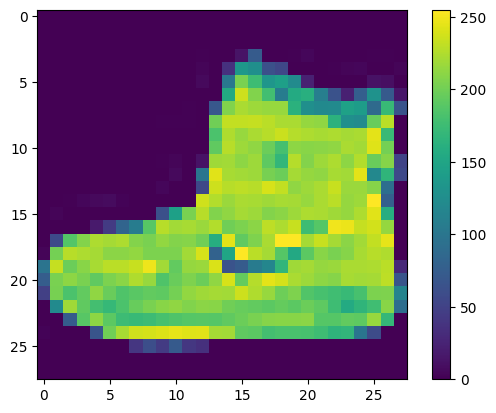

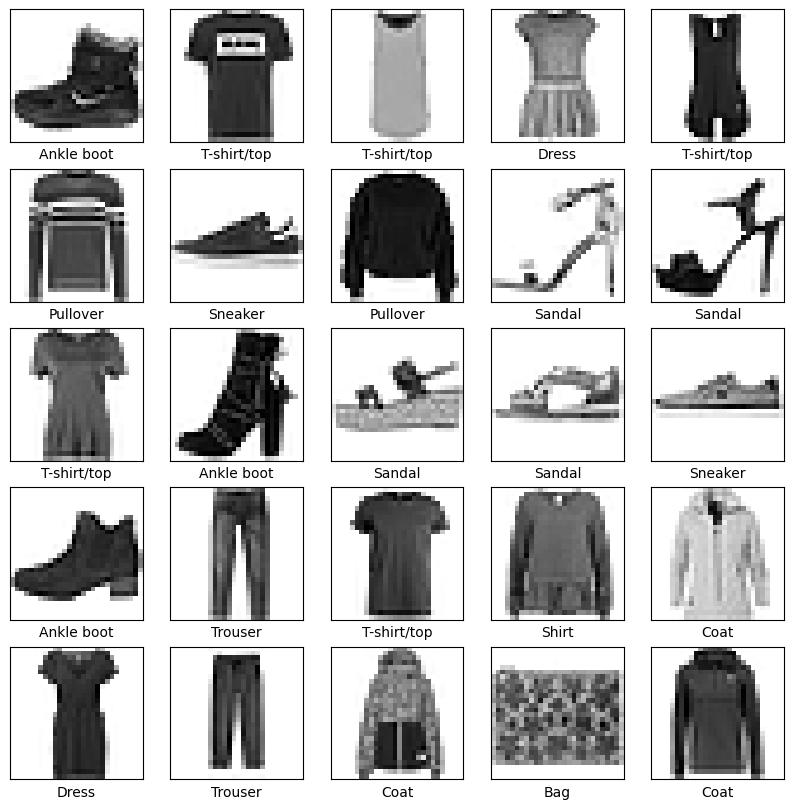

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5001 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3748 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3373 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3125 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2964 - accuracy: 0.8900
313/313 - 1s - loss: 0.3563 - accuracy: 0.8720 - 673ms/epoch - 2ms/step

테스트 정확도: 0.871999979019165


In [15]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

In [4]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12023582249038637102
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1297474971
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6873031478960346079
physical_device_desc: "device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:2d:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 모델 학습

### ImageDataGenerator

In [3]:
# 케라스로 ImageDataGenerator 클래스의 객체를 생성하고
#rescale옵션을 지정해 이미지 각 픽셀의 값을 0~1로 정규화한다.
# 생성된 제너레이터 객체를 image_gen변수에 할당한다.

image_gen = ImageDataGenerator(rescale=1/255.0)
image_gen

### flow_from_directory함수

In [4]:
# flow_from_directory함수로 폴더에서 이미지를 가져와 제너레이터 객체로 정리

train_dir = './cat_and_dog/training_set/training_set'
valid_dir = './cat_and_dog/test_set/test_set'

train_gen = image_gen.flow_from_directory(train_dir,
                                          batch_size=32,
                                          target_size=(224,224),
                                          classes=['cats','dogs'],
                                          class_mode = 'binary',
                                          seed=2023
                                          )

valid_gen = image_gen.flow_from_directory(valid_dir,
                                          batch_size=32,
                                          target_size=(224,224),
                                          classes=['cats','dogs'],
                                          class_mode = 'binary',
                                          seed=2023
                                          )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [5]:
# 샘플 이미지 출력(첫번째 배치)

batch = next(train_gen)

type(batch)
len(batch)
batch[0]
batch[1]

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
      dtype=float32)

NameError: name 'labels' is not defined

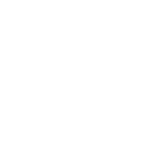

In [6]:
class_labels = ['cat','dog']
plt.figure(figsize=(16,8))
for i in range(0,32):
    ax = plt.subplot(4,8,i+1)
    plt.axis('off')
    plt.title(class_labels[int(labels[i])])
    plt.imshow(images[i])
plt.show()

### 모델 훈련

In [6]:
# Sequential API를 활용하여 샘플 모델 생성
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout,Flatten

model = Sequential([
    # 합성곱층
    Conv2D(32, (3, 3), padding='same', activation='LeakyReLU', input_shape=(224, 224, 3)),
    MaxPooling2D(2),
    BatchNormalization(),
    Conv2D(64, 3, padding='same', activation='LeakyReLU'),
    MaxPooling2D(2),
    BatchNormalization(),
    Conv2D(128, 3, padding='same', activation='LeakyReLU'),
    MaxPooling2D(2),
    BatchNormalization(),
    #출력 직전 은닉층
    Flatten(),
    Dense(256, activation='LeakyReLU'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                        

In [7]:
# 모델 컴파일

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

In [7]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [9]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [13]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
session = tf.compat.v1.Session(config=config)

In [12]:
import tensorflow as tf

print(tf.__version__)

2.9.1


In [17]:
session.close()

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # 사용할 GPU 장치 번호를 입력합니다.

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # 메모리 증가 옵션을 활성화합니다.
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    # 최대 메모리를 제한합니다.
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])
  except RuntimeError as e:
    # 메모리 증가 옵션을 설정하지 못하면 오류 메시지를 출력합니다.
    print(e)

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Restrict TensorFlow to only allocate 2GB of memory on the first GPU
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)


1 Physical GPUs, 1 Logical GPUs


In [13]:
# gpu 초기화
import os
import subprocess
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
subprocess.call(['nvidia-smi', '--gpu-reset', '-i', '0'])
os.environ.pop('CUDA_VISIBLE_DEVICES')

'0'

In [ ]:
tf.config.experimental.reset_all()

In [8]:
# 모델 훈련```
model.fit(train_gen,validation_data=valid_gen, epochs=3,verbose=2)


Epoch 1/3
251/251 - 66s - loss: 9.3600 - accuracy: 0.6180 - val_loss: 8.2355 - val_accuracy: 0.5012 - 66s/epoch - 263ms/step
Epoch 2/3
251/251 - 61s - loss: 1.8465 - accuracy: 0.7144 - val_loss: 1.0580 - val_accuracy: 0.6520 - 61s/epoch - 242ms/step
Epoch 3/3
251/251 - 63s - loss: 0.5111 - accuracy: 0.7861 - val_loss: 0.5389 - val_accuracy: 0.7538 - 63s/epoch - 253ms/step


In [9]:
model = tf.keras.models.load_model('225.1_cat_and_dog_without_aug.h5')

In [49]:
df = pd.read_csv('255.1_cat_and_dog_without_aut.csv')
df

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,1.878955,0.537539,3.369026,0.549184
1,1,0.650808,0.597127,0.644956,0.653485
2,2,0.616705,0.634978,0.569650,0.710331
3,3,0.591554,0.652842,0.589187,0.672763
4,4,0.574742,0.672580,0.561298,0.722689
5,5,0.552955,0.683323,0.562733,0.719229
6,6,0.554077,0.687570,0.590849,0.683144
7,7,0.529589,0.721299,0.507137,0.761740
8,8,0.500954,0.733042,0.577617,0.720712
9,9,0.466714,0.764397,0.615334,0.707860


In [40]:
df = pd.DataFrame(hist.history)
df

AttributeError: 'DataFrame' object has no attribute 'history'

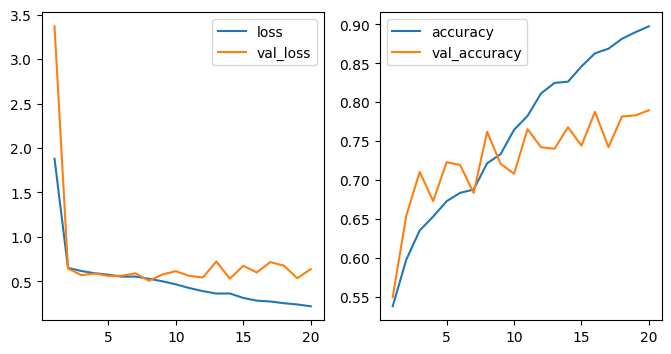

In [50]:
# 손실함수, 정확도 시각화
fig, ax = plt.subplots(figsize=(8, 4), nrows=1, ncols=2)

ax[0].plot(range(1, 21), df['loss'], label='loss')
ax[0].plot(range(1,21), df['val_loss'], label='val_loss')
ax[0].legend()
ax[1].plot(range(1, 21), df['accuracy'], label='accuracy')
ax[1].plot(range(1,21), df['val_accuracy'], label='val_accuracy')
ax[1].legend();

###  데이터 증강

In [ ]:
# 이미지 데이터 제너레이터 정의(  Augmentation 적용)
image_gen_aug = ImageDataGenerator(rescale = 1/255,
                                  horizontal_flip = True,
                                  rotation_range=30, 
                                  shear_range=0.15,
                                  zoom_range=0.3)

# flow_from_directory 함수로 폴더에서 이미지 가져와서 제너레이터 객체로 정리
train_gen_aug = image_gen_aug.flow_from_directory(train_dir,
                                                 batch_size=32,
                                                 target_size=(224, 224),
                                                 classes=['cats', 'dogs'],
                                                 class_mode ='binary',
                                                 seed=2020)
valid_gen_aug = image_gen_aug.flow_from_directory(valid_dir,
                                                 batch_size=32,
                                                 target_size=(224, 224),
                                                 classes=['cats', 'dogs'],
                                                 class_mode ='binary',
                                                 seed=2020)

In [ ]:
# 모델 생성


In [ ]:
# 모델 컴파일
model_aug.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), 
                  loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
                 metrics=['accuracy'])

In [ ]:
# 모델 훈련
history_aug = model_aug.fit(train_gen_aug, validation_data = valid_gen_aug, epochs=40)

In [ ]:
model_aug.save('255.1_cnn_catsndogs_data_aug.h5')

In [ ]:
import pandas as pd
df = pd.DataFrame(history_aug.history)
df.to_csv("./output/255.1_데이터증강_history.csv", index=False)
df = pd.read_csv("./output/255.1_데이터증강_history.csv")
df

In [ ]:
# 손실함수, 정확도 그래프 그리기

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(range(1, 21), df['loss'], label='train_loss')
plt.plot(range(1, 21), df['val_loss'], label='val_loss');